## Project 2 ##
Kyle Demers

In [143]:
#make nice plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#import modules
import numpy as np
import operator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [3]:
#set seed
np.random.seed(123)

# Problem 1 #

In [4]:
x = np.linspace(0,np.pi,50)
epsilon = np.random.normal(scale=0.2,size=x.shape)
y = np.sin(4*x) + epsilon

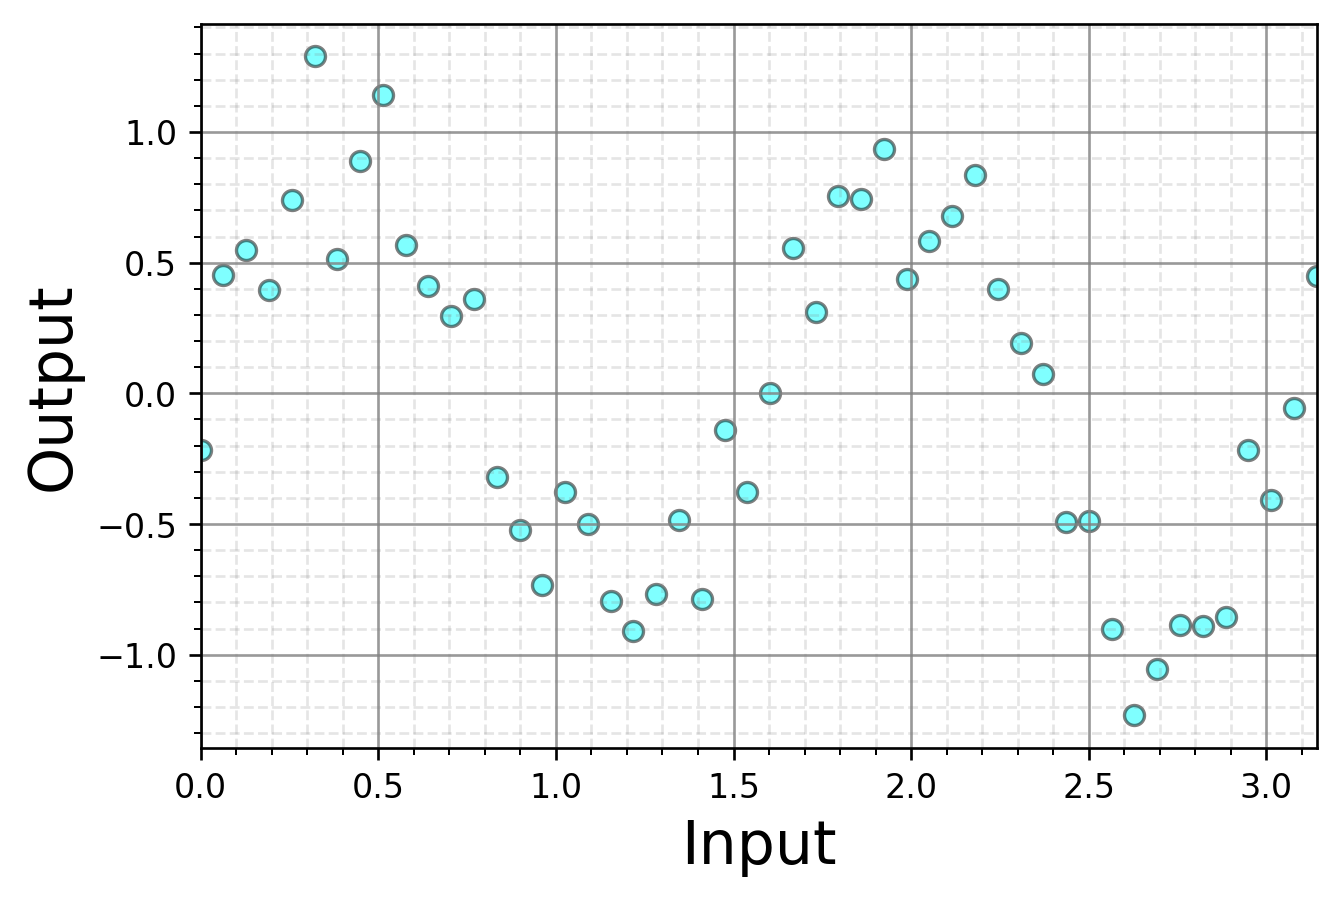

In [5]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.set_xlim([0,np.pi]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(visible=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(visible=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [6]:
deg = 5 #set degree
poly = PolynomialFeatures(degree=deg)
x_poly = poly.fit_transform(x.reshape((-1,1))) # in x_poly we get the polynomial features

In [7]:
x.reshape(-1,1)[:10]

array([[0.        ],
       [0.06411414],
       [0.12822827],
       [0.19234241],
       [0.25645654],
       [0.32057068],
       [0.38468481],
       [0.44879895],
       [0.51291309],
       [0.57702722]])

In [8]:
x_poly[:10,:]#[x**0,x**1,x**2,x**3,x**k]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.41141358e-02, 4.11062241e-03, 2.63549003e-04,
        1.68972166e-05, 1.08335044e-06],
       [1.00000000e+00, 1.28228272e-01, 1.64424896e-02, 2.10839203e-03,
        2.70355465e-04, 3.46672140e-05],
       [1.00000000e+00, 1.92342407e-01, 3.69956017e-02, 7.11582309e-03,
        1.36867454e-03, 2.63254156e-04],
       [1.00000000e+00, 2.56456543e-01, 6.57699585e-02, 1.68671362e-02,
        4.32568744e-03, 1.10935085e-03],
       [1.00000000e+00, 3.20570679e-01, 1.02765560e-01, 3.29436254e-02,
        1.05607604e-02, 3.38547012e-03],
       [1.00000000e+00, 3.84684815e-01, 1.47982407e-01, 5.69265847e-02,
        2.18987927e-02, 8.42413301e-03],
       [1.00000000e+00, 4.48798951e-01, 2.01420498e-01, 9.03973081e-02,
        4.05702170e-02, 1.82078708e-02],
       [1.00000000e+00, 5.12913086e-01, 2.63079834e-01, 1.34937090e-01,
        6.92109991e-02, 

In [9]:
# the model created is linear in weights 
model = LinearRegression()
model.fit(x_poly, y) # so we fit linear regression of polynomial features
y_poly_pred = model.predict(x_poly)

The Coefficient of Determination is 0.827349

In [10]:
r2 = r2_score(y,y_poly_pred)
print('The model score of degree ' + str(deg) + ' is ' + str(r2))

The model score of degree 5 is 0.8273496906692741


Create a graph of the noisy sin wave and the model fit on top of it

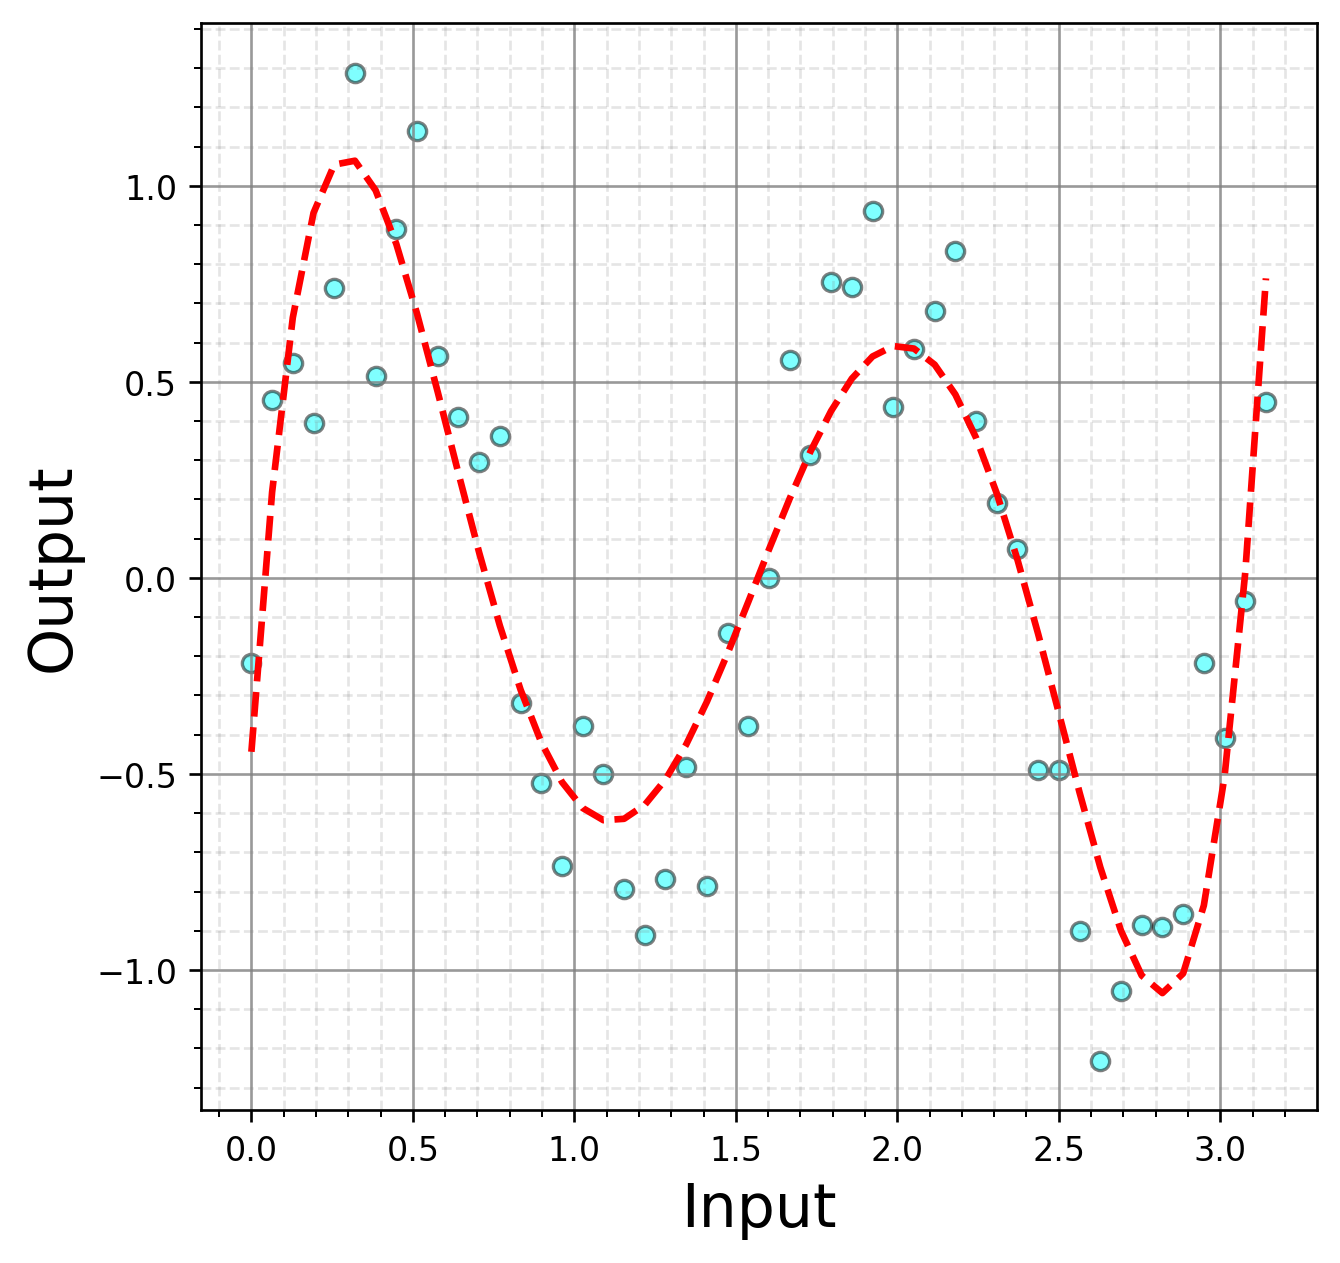

In [11]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6)
ax.scatter(x, y, s=30,ec='k',color='cyan',alpha=0.5)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
ax.plot(x_sorted, y_poly_pred, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(visible=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(visible=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

***Results:*** The Degree 5 polynomial is the best fit without overfitting the model. This is where the most drastic change in model score occurs. This also makes sense due to the amount of changes in directions shown in the graph. 

# Question 2 #

In [12]:
data = pd.read_csv('qsar_fish_toxicity.csv', sep = ';')

In [13]:
data.head()

,3.26,0.829,1.676,0,1,1.453,3.770
0,2.189,0.580,0.863,0,0,1.348,3.115
1,2.125,0.638,0.831,0,0,1.348,3.531
2,3.027,0.331,1.472,1,0,1.807,3.510
3,2.094,0.827,0.860,0,0,1.886,5.390
4,3.222,0.331,2.177,0,0,0.706,1.819


In [14]:
data.columns = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50 [-LOG(mol/L)]']

In [15]:
data.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,2.189,0.580,0.863,0,0,1.348,3.115
1,2.125,0.638,0.831,0,0,1.348,3.531
2,3.027,0.331,1.472,1,0,1.807,3.510
3,2.094,0.827,0.860,0,0,1.886,5.390
4,3.222,0.331,2.177,0,0,0.706,1.819


In [38]:
# extract x and y
x = data.loc[:,'CIC0':'MLOGP'].values
y = data['LC50 [-LOG(mol/L)]'].values

In [39]:
#x.shape
#y.shape

In [40]:
# we need a funciton defined that will perform KFold
kf = KFold(n_splits=10,shuffle=True,random_state=123)

# Linear Regressions: #

In [139]:
# here I would like to create a pipeline function that combines multple procedures
# such as first scaling and then polynomial features
scale = StandardScaler()
poly = PolynomialFeatures(degree=2)

In [140]:
pipe = Pipeline([['Scaler',scale],['Polynomial Features',poly]])

In [141]:
# we need the actual cross- validations
score_train = []
score_test = []
scores = []
model = LinearRegression(fit_intercept=False)
#a_range = np.linspace(0.0001,2, 100)
#for i in a_range:
    #model = Ridge(alpha= i,fit_intercept=False)

for idxtrain, idxtest in kf.split(x):    
    xtrain = x[idxtrain]
    xtest = x[idxtest]
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    # here we apply the pipeline
    xpolytrain = pipe.fit_transform(xtrain)
    xpolytest = pipe.transform(xtest)
    model.fit(xpolytrain,ytrain)
    score_train.append(model.score(xpolytrain,ytrain))
    score_test.append(model.score(xpolytest,ytest))
    #scores.append(np.mean(score_test))
#idx = np.argmax(scores)
#print('Optimal alpha value: ' + format(a_range[idx], '.3f'))

In [130]:
# for the linear model
print('The internal validation R2 score is : ' +str(np.mean(score_train)))
print('The external validation R2 score is : ' +str(np.mean(score_test)))

The internal validation R2 score is : 0.5775953719976143
The external validation R2 score is : 0.5541478466095782


In [142]:
# for the quadratic model
print('The internal validation R2 score is : ' +str(np.mean(score_train)))
print('The external validation R2 score is : ' +str(np.mean(score_test)))

The internal validation R2 score is : 0.6266685041130602
The external validation R2 score is : 0.5523513800862917


In [138]:
# for the cubic model
print('The internal validation R2 score is : ' +str(np.mean(score_train)))
print('The external validation R2 score is : ' +str(np.mean(score_test)))

The internal validation R2 score is : 0.7143294008680912
The external validation R2 score is : 0.42139552382992684


***Results:*** The best Linear Regression model is the linear model, with an external validation R2 score of 0.5524. Note that the internal scores get better while the external scores get worse. Model is becoming more overfit.

# Ridge Regressions: #

In [123]:
# here I would like to create a pipeline function that combines multple procedures
# such as first scaling and then polynomial features
scale = StandardScaler()
poly = PolynomialFeatures(degree=3)
pipe = Pipeline([['Scaler',scale],['Polynomial Features',poly]])

In [124]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(5,15,101)
for i in a_range:
    model = Ridge(alpha=i, fit_intercept=False)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 8.400


In [84]:
# for the Ridge Linear model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Ridge Linear Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.5775083767753099
The external validation R2 score is : 0.5542401475081402
The optimal alpha for the Ridge Linear Model is 2.680


In [88]:
# for the Ridge Quadratic model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Ridge Quadratic Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.6264993187036156
The external validation R2 score is : 0.5525744261056371
The optimal alpha for the Ridge Quadratic Model is 1.800


In [94]:
# for the Ridge Cubic model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Ridge Cubic Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.7060575222201463
The external validation R2 score is : 0.46072118150909
The optimal alpha for the Ridge Cubic Model is 8.400


***Results*** The best Ridge regression is a Linear model with an alpha of 2.680 Resulting in external validation R2 Score of 0.5525.

# Lasso Regressions: #

In [104]:
# here I would like to create a pipeline function that combines multple procedures
# such as first scaling and then polynomial features
scale = StandardScaler()
poly = PolynomialFeatures(degree=3)
pipe = Pipeline([['Scaler',scale],['Polynomial Features',poly]])

In [106]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(0.01,2,101)
for i in a_range:
    model = Lasso(alpha=i, fit_intercept=False)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 0.030


In [100]:
# for the Lasso Linear model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Lasso Linear Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.5763468482745682
The external validation R2 score is : 0.5545204144958801
The optimal alpha for the Lasso Linear Model is 0.021


In [103]:
# for the Lasso Quadratic model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Lasso Quadratic Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.6183083773659013
The external validation R2 score is : 0.5675318499738984
The optimal alpha for the Lasso Quadratic Model is 0.021


In [107]:
# for the Lasso Cubic model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Lasso Cubic Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.6688015794682992
The external validation R2 score is : 0.5559587304670908
The optimal alpha for the Lasso Cubic Model is 0.030


***Results:*** The Greatest Lasso Regression was the Quadratic Regression with an alpha of .0021 and an external validation R2 score of .5675.

# ElasticNet Regressions: #

In [119]:
# here I would like to create a pipeline function that combines multple procedures
# such as first scaling and then polynomial features
scale = StandardScaler()
poly = PolynomialFeatures(degree=3)
pipe = Pipeline([['Scaler',scale],['Polynomial Features',poly]])

In [121]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(0.01,2,101)
for i in a_range:
    model = ElasticNet(alpha=i, fit_intercept=False)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 0.030


In [115]:
# for the ElasticNet Linear model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Lasso Linear Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.5775915879016367
The external validation R2 score is : 0.5542057242625653
The optimal alpha for the Lasso Linear Model is 0.001


In [118]:
# for the ElasticNet Quadratic model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the ElasticNet Quadratic Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.6187734064364911
The external validation R2 score is : 0.5584809087537586
The optimal alpha for the ElasticNet Quadratic Model is 0.021


In [122]:
# for the ElasticNet Cubic model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the ElasticNet Cubic Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.6805717171767421
The external validation R2 score is : 0.5350561268424006
The optimal alpha for the ElasticNet Cubic Model is 0.030


***Results:*** The Greatest ElasticNet Regression was the Quadratic Regression with an alpha of .0021 and an external validation R2 score of .5585.